# Improting Libraries

In [33]:
import re
import nltk
import string
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import wordnet
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Loading & Anlyzing Data 

In [34]:
df = pd.read_csv(r"../data/Tweets_Sentiment.csv")
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [35]:
# checking shape of data
df.shape

(27481, 4)

In [36]:
# checking null data
df.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [37]:
# checking duplicate data
df.duplicated().sum()

0

In [38]:
# droping null values
df.dropna(inplace=True)

In [39]:
# dropping useless columns
df.drop(columns=['textID', 'selected_text'], inplace=True)

# Exploratory Data Analysis

In [40]:
# Sentiment Distritbution
df['sentiment'].value_counts()

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

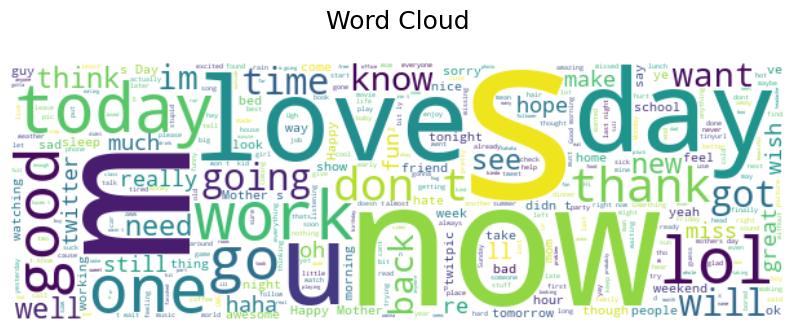

In [41]:
# Most used words (500)

# Combine all text into a single string
text_data = " ".join(df['text'].dropna())

# Create a word cloud
wordcloud = WordCloud(width=600, height=200, 
                      background_color='white', 
                      colormap='viridis',
                      max_words=500,
                      contour_width=1, 
                      contour_color='steelblue').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud", fontsize=18, y=1.1, )
plt.show()

# Text Preprocessing

In [42]:
# lowercasing the tweets
df['text'] = df['text'].apply(lambda tweet: str.lower(tweet))

In [43]:
# removing integers
df['text'].apply(lambda tweet: re.sub('[0-9]+', '', tweet))

0                      i`d have responded, if i were going
1            sooo sad i will miss you here in san diego!!!
2                                my boss is bullying me...
3                           what interview! leave me alone
4         sons of ****, why couldn`t they put them on t...
                               ...                        
27476     wish we could come see u on denver  husband l...
27477     i`ve wondered about rake to.  the client has ...
27478     yay good for both of you. enjoy the break - y...
27479                           but it was worth it  ****.
27480       all this flirting going on - the atg smiles...
Name: text, Length: 27480, dtype: object

In [44]:
# removing punctuations
punctuations_list = string.punctuation

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

df['text'] = df['text'].apply(remove_punctuations)

In [45]:
# tokenizing the words
df['text'] = df['text'].apply(lambda tweet: word_tokenize(tweet))

In [46]:
# removing stopwords

# list of stopwords
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma', 'id'
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 
             'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves', "ive", 'couldnt']

df['text'] = df['text'].apply(lambda tweet: [word for word in tweet if word not in stopwordlist])

In [47]:
# Apply Lemmatization
def lemmatize_words(tweet):
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word, pos='v') for word in tweet])

df['text'] = df['text'].apply(lambda tweet: lemmatize_words(tweet))

In [48]:
# Encoding Dependent Feature
df['sentiment'] = df['sentiment'].map({"neutral":0, "positive":1, "negative":-1})

# Splitting DataSet

In [49]:
# Splitting dataset into dependent & independent variable
X = df['text']
y = df['sentiment']

In [50]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, stratify=y, random_state=42)

# TF-IDF 

In [51]:
# Applying Vectorization and transforming data into vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_vec = tfidf_vectorizer.fit_transform(X_train)
X_test_vec = tfidf_vectorizer.transform(X_test)

In [52]:
import pickle

# Save the vectorizer
with open('../models/twitter_sentiment_tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

# Model Training

In [53]:
# Model Training
svm_model = SVC(kernel='linear')  
svm_model.fit(X_train_vec, y_train)

# Step 4: Make predictions on the test set
y_pred = svm_model.predict(X_test_vec)

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6984473556525959
Classification Report:
              precision    recall  f1-score   support

          -1       0.72      0.61      0.66      2334
           0       0.64      0.76      0.69      3335
           1       0.79      0.70      0.74      2575

    accuracy                           0.70      8244
   macro avg       0.72      0.69      0.70      8244
weighted avg       0.71      0.70      0.70      8244



In [54]:
# Saving the model using pickle
with open('../models/twitter_sentiment_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

# Testing


In [55]:
# list of stopwords
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma', 'id'
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 
             'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves', "ive", 'couldnt']


# Load the vectorizer using joblib
vectorizer = joblib.load('../models/twitter_sentiment_tfidf_vectorizer.pkl')
model = joblib.load("../models/twitter_sentiment_model.pkl")

def predict_sentiment(tweet):
    # lowering the tweet
    tweet = str.lower(tweet)

    # removing integers
    tweet = re.sub("[0-9]+", '', tweet)

    # removing punctuations
    punctuations_list = string.punctuation
    translator = str.maketrans('', '', punctuations_list)
    tweet = tweet.translate(translator)
    
    # tokenizing the words
    tweet = word_tokenize(tweet)

    # removing stopwords
    tweet = [word for word in tweet if word not in stopwordlist]

    # Apply Lemmatization
    lemmatizer = WordNetLemmatizer()
    tweet = " ".join([lemmatizer.lemmatize(word, pos='v') for word in tweet])

    # Pass the string inside a list
    transformed_text = tfidf_vectorizer.transform([tweet])
    
    # If you want to see the transformed result, you can convert it to an array
    transformed_text_array = transformed_text.toarray()
    
    # Making Predictions
    predictions = model.predict(transformed_text_array)
    
    # Output the predictions
    mp = {-1:"Negative", 1:"Positive", 0:"Neutral"}
    print("Prediction:", mp[predictions[0]])

In [62]:
tweet1 = "Hello there, My name is Harry and I love what you did with the sentiment analysis system"
tweet2 = "Hello there, i do not like you"
tweet3 = "You are the best person i have encountered in my life"
tweet4 = "I just went to my job, nothing new is happening now"
tweet5 = "Hey there how you doin man, you are crazy person. you are a failed person"


for tweet in [tweet1, tweet2, tweet3, tweet4, tweet5]:
    print(f"Tweet- {tweet}")
    predict_sentiment(tweet)
    print("")

Tweet- Hello there, My name is Harry and I love what you did with the sentiment analysis system
Prediction: Positive

Tweet- Hello there, i do not like you
Prediction: Neutral

Tweet- You are the best person i have encountered in my life
Prediction: Positive

Tweet- I just went to my job, nothing new is happening now
Prediction: Neutral

Tweet- Hey there how you doin man, you are crazy person. you are a failed person
Prediction: Negative

